ENV

In [1]:
import pandas as pd
import numpy as np

import networkx as nx
import pyvis
from pyvis import network
from pyvis.network import Network


import matplotlib.pyplot as plt



Importing dataset

In [2]:
book1_df = pd.read_csv('dataset/Game-Of-Thrones/book1.csv')

In [3]:
book1_df.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [4]:
book1_df.duplicated().sum()

0

In [5]:
book1_df.isnull().sum()

Source    0
Target    0
Type      0
weight    0
book      0
dtype: int64

In [6]:
book1_df.Type.value_counts()

Undirected    684
Name: Type, dtype: int64

In [7]:
# book1_df.groupby(['Source','Target']).head()

## Graph Visualization

In [10]:
G=nx.from_pandas_edgelist(
    df=book1_df, 
    source='Source', 
    target='Target', 
    edge_attr='weight',
    create_using=nx.Graph()
    )

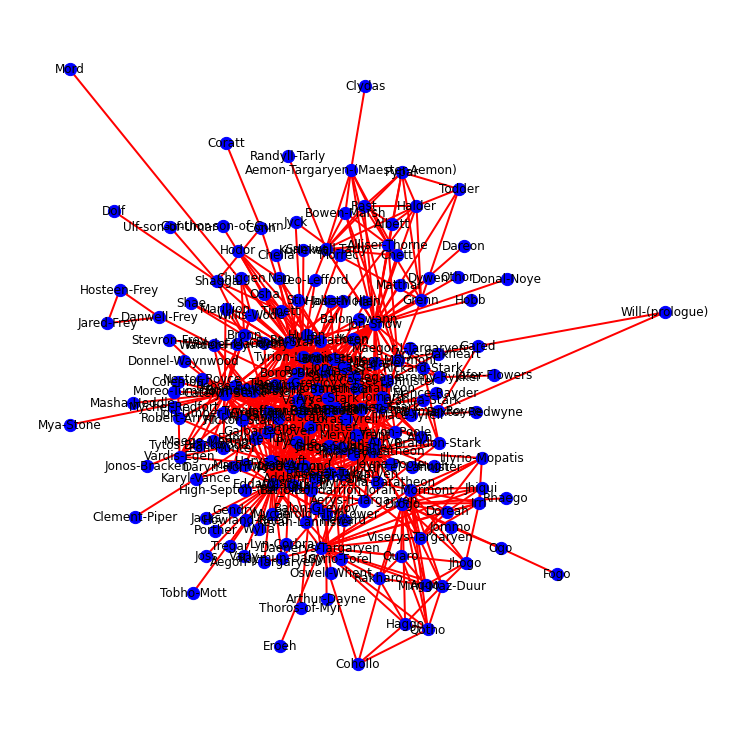

In [12]:
plt.figure(figsize=(10,10))
graph = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True,node_color='blue',node_size=150,edge_color='red',width=2,pos=graph)
plt.show()

## Pyvis is better with this 

In [21]:
net = Network(notebook=True, width='100%', height='100%',bgcolor='#222222',font_color='#ffffff')

# using node degree for size the nodes
node_degree = dict(G.degree)

# set node sizes 
nx.set_node_attributes(G,node_degree,'size')
net.from_nx(G)
net.show('Got_book_1.html')

### Identify Most Important Characters

In [28]:
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'Addam-Marbrand': 0.010752688172043012,
 'Jaime-Lannister': 0.15591397849462366,
 'Tywin-Lannister': 0.11827956989247312,
 'Aegon-I-Targaryen': 0.010752688172043012,
 'Daenerys-Targaryen': 0.11290322580645162,
 'Eddard-Stark': 0.3548387096774194,
 'Aemon-Targaryen-(Maester-Aemon)': 0.03763440860215054,
 'Alliser-Thorne': 0.05376344086021506,
 'Bowen-Marsh': 0.02688172043010753,
 'Chett': 0.016129032258064516,
 'Clydas': 0.005376344086021506,
 'Jeor-Mormont': 0.06989247311827958,
 'Jon-Snow': 0.19892473118279572,
 'Samwell-Tarly': 0.06451612903225806,
 'Aerys-II-Targaryen': 0.03225806451612903,
 'Brandon-Stark': 0.03225806451612903,
 'Gerold-Hightower': 0.02688172043010753,
 'Jon-Arryn': 0.08064516129032259,
 'Robert-Baratheon': 0.2688172043010753,
 'Aggo': 0.03225806451612903,
 'Drogo': 0.10215053763440861,
 'Jhogo': 0.03225806451612903,
 'Jorah-Mormont': 0.06989247311827958,
 'Quaro': 0.02688172043010753,
 'Rakharo': 0.02688172043010753,
 'Albett': 0.016129032258064516,
 'Halder': 0.

<AxesSubplot:>

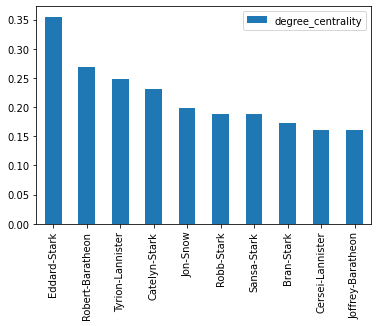

In [29]:
degree_df = pd.DataFrame.from_dict(
    data=degree_centrality,
    orient='index',
    columns=['degree_centrality']
    )
degree_df.sort_values(by='degree_centrality',ascending=False)[0:10].plot(kind='bar')

<AxesSubplot:>

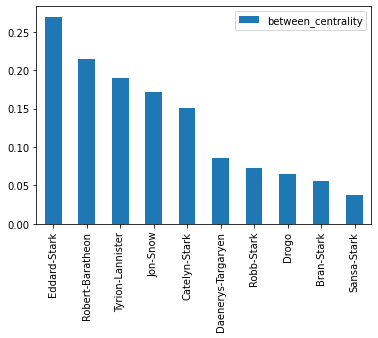

In [30]:
#betweeness centerlity
between_centrality = nx.betweenness_centrality(G)

degree_df = pd.DataFrame.from_dict(
    data=between_centrality,
    orient='index',
    columns=['between_centrality']
    )
degree_df.sort_values(by='between_centrality',ascending=False)[0:10].plot(kind='bar')

<AxesSubplot:>

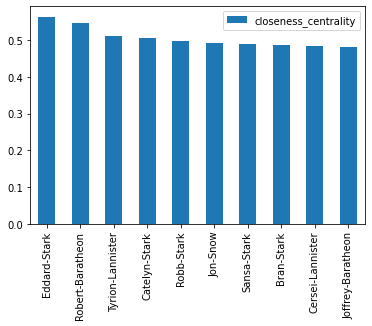

In [31]:
#closeness centrality
closeness_centrality = nx.closeness_centrality(G)

degree_df = pd.DataFrame.from_dict(
    data=closeness_centrality,
    orient='index',
    columns=['closeness_centrality']
    )
degree_df.sort_values(by='closeness_centrality',ascending=False)[0:10].plot(kind='bar')

In [32]:
# save centrality measures 
degree_df.to_csv('dataset/measurements/centrality_measures.csv')


In [33]:
nx.set_node_attributes(G,closeness_centrality,'closeness_centrality')
nx.set_node_attributes(G,between_centrality,'between_centrality')
nx.set_node_attributes(G,degree_centrality,'degree_centrality')

### Community Detection

In [23]:
import community as community_louvain

In [24]:
community_louvain = community_louvain.best_partition(G)

In [25]:
community_louvain

{'Addam-Marbrand': 0,
 'Jaime-Lannister': 0,
 'Tywin-Lannister': 0,
 'Aegon-I-Targaryen': 1,
 'Daenerys-Targaryen': 1,
 'Eddard-Stark': 2,
 'Aemon-Targaryen-(Maester-Aemon)': 3,
 'Alliser-Thorne': 3,
 'Bowen-Marsh': 3,
 'Chett': 3,
 'Clydas': 3,
 'Jeor-Mormont': 3,
 'Jon-Snow': 3,
 'Samwell-Tarly': 3,
 'Aerys-II-Targaryen': 2,
 'Brandon-Stark': 2,
 'Gerold-Hightower': 2,
 'Jon-Arryn': 2,
 'Robert-Baratheon': 2,
 'Aggo': 1,
 'Drogo': 1,
 'Jhogo': 1,
 'Jorah-Mormont': 1,
 'Quaro': 1,
 'Rakharo': 1,
 'Albett': 3,
 'Halder': 3,
 'Rast': 3,
 'Grenn': 3,
 'Pypar': 3,
 'Tyrion-Lannister': 0,
 'Alyn': 2,
 'Harwin': 2,
 'Jory-Cassel': 2,
 'Tomard': 2,
 'Arthur-Dayne': 2,
 'Arya-Stark': 4,
 'Benjen-Stark': 3,
 'Bran-Stark': 7,
 'Catelyn-Stark': 0,
 'Cersei-Lannister': 2,
 'Desmond': 4,
 'Ilyn-Payne': 4,
 'Jeyne-Poole': 4,
 'Joffrey-Baratheon': 4,
 'Meryn-Trant': 4,
 'Mordane': 4,
 'Mycah': 4,
 'Myrcella-Baratheon': 4,
 'Petyr-Baelish': 2,
 'Rickon-Stark': 7,
 'Robb-Stark': 7,
 'Rodrik-Cassel': 0

In [34]:
nx.set_node_attributes(G,community_louvain,'group')

In [36]:
community_net = Network(notebook=True, width='100%', height='100%',bgcolor='#222222',font_color='#ffffff')
community_net.from_nx(G)
community_net.show('Got_book_1_community.html')